In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
import sys
sys.path.append('..')
from dataset import batcher

In [329]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [416]:
# Get test split
test_batcher = batcher.Batcher(bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 4)


In [417]:
# Load model
experiments = ['imagery_sample_vgg_regression_rgb_nightlights']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [418]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-05 09:44:35.814650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[ 1.1998117 ]
 [ 0.46804056]
 [-0.3292327 ]
 [-0.3781111 ]
 [ 1.5930634 ]
 [ 0.16518934]
 [ 1.1762855 ]
 [-0.00362219]
 [-0.06456707]
 [ 0.3760363 ]
 [-0.4340258 ]
 [ 0.9071296 ]
 [-0.4179784 ]
 [-0.15446506]
 [ 0.7280815 ]
 [ 0.27891663]
 [-0.30132383]
 [-0.37783006]
 [-0.07269039]
 [-0.37095615]
 [-0.27449206]
 [-0.41338167]
 [ 1.1998117 ]
 [ 0.3357884 ]
 [-0.2648593 ]
 [-0.31910762]
 [-0.51955074]
 [ 0.480696  ]
 [-0.5661693 ]
 [-0.5169665 ]
 [-0.3945335 ]
 [ 1.6081111 ]
 [ 0.1738972 ]
 [-0.34862602]
 [-0.12635012]
 [-0.37831703]
 [ 0.4063201 ]
 [-0.43184173]
 [-0.33167395]
 [ 0.24226137]
 [ 0.47941738]
 [-0.47838762]
 [-0.33316448]
 [-0.23116447]
 [-0.4894586 ]
 [ 0.2863771 ]
 [ 0.4077655 ]
 [-0.419762  ]
 [ 0.78425145]
 [-0.13150969]
 [ 0.45604274]
 [ 0.21505195]
 [-0.37753555]
 [-0.3179241 ]
 [ 0.81146973]
 [-0.45191452]
 [-0.5047756 ]
 [-0.4904867 ]
 [-0.42853066]
 [-0.3366196 ]
 [ 0.67163557]
 [ 0.6471302 ]
 [-0.30419326]
 [-0.56724757]
 [-0.2853232 ]
 [-0.4741561 ]
 [ 1.60811

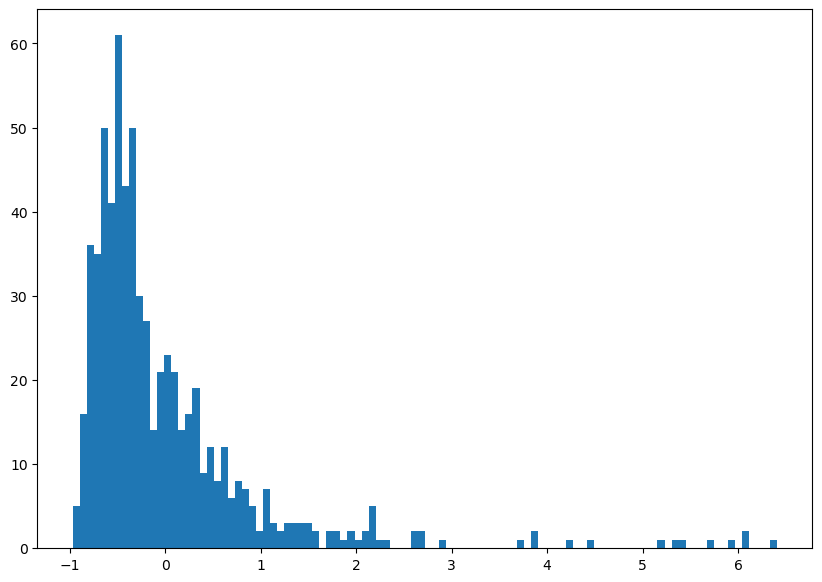

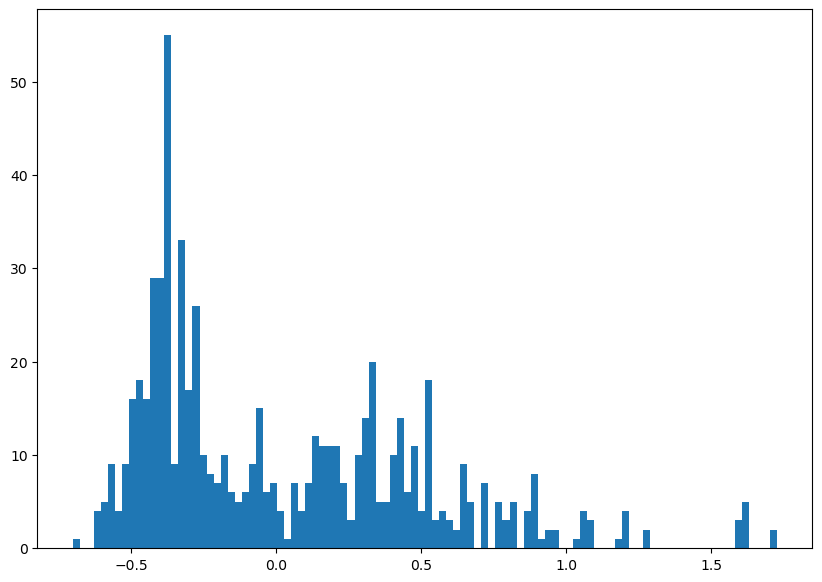

In [419]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

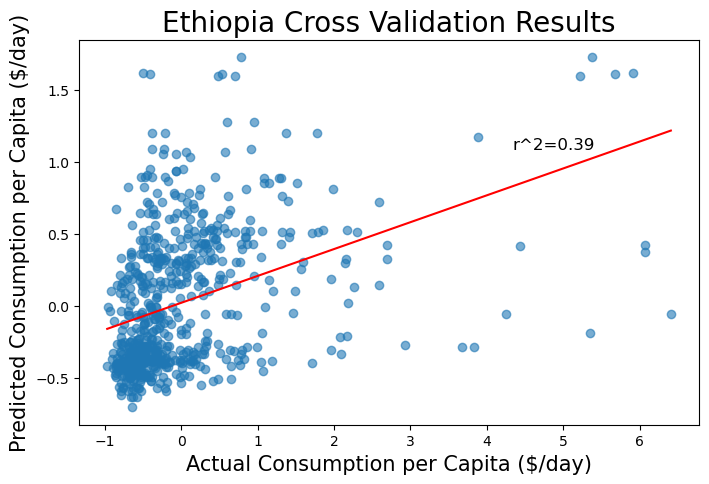

In [420]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()